<a href="https://colab.research.google.com/github/Hbrand03/Machine-Learning-for-the-Internet-of-Things/blob/main/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hw4_data.csv to hw4_data.csv


True Positives: 26
False Positives: 3
True Negatives: 150
False Negatives: 21
Precision: 0.8966
Recall: 0.5532


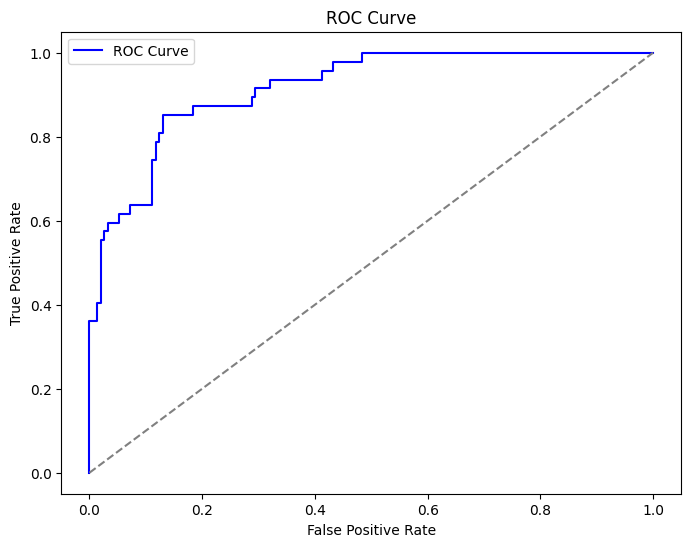

Minimum False Positive Rate at ≥90% recall: 0.2941


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_curve

df = pd.read_csv('hw4_data.csv') #loading data

#converting columns to numpy arrays
model_output = df['model_output'].to_numpy()
true_class = df['true_class'].to_numpy()
y_pred = df['prediction'].to_numpy()

#compute confusion matrix values
TP = np.sum((y_pred == 1) & (true_class == 1))
FP = np.sum((y_pred == 1) & (true_class == 0))
TN = np.sum((y_pred == 0) & (true_class == 0))
FN = np.sum((y_pred == 0) & (true_class == 1))

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")
print(f"False Negatives: {FN}")

#compute precision and recall
precision = precision_score(true_class, y_pred)
recall = recall_score(true_class, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(true_class, model_output)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label = "ROC Curve", color = "blue")
plt.plot([0, 1], [0, 1], linestyle='--', color = "gray")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#find minimum FPR for 90% recall
target_recall = 0.9
valid_indices = np.where(tpr >= target_recall)[0]
min_fpr = np.min(fpr[valid_indices])
print(f"Minimum False Positive Rate at ≥90% recall: {min_fpr:.4f}")

